In [23]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels as sm
import matplotlib.pyplot as plt
import scikitplot as skplt
from matplotlib import pyplot
from collections import Counter
import datetime as dt
import warnings
import math
warnings.filterwarnings('ignore')

Objective-The goal is to predict flight price based on diffrent features like ,date of journey,flight,route,dept time ,duration,total stops,etc.

In [24]:
#read training dataset to get overview about data
Flight_Train=pd.read_excel(r"C:\Users\INPshy\Desktop\DATA Science\Flight Prediction\Data_Train.xlsx")
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
Flight_Train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [26]:
#check missing values
Flight_Train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops both having 1 missing values

In [27]:
#impute missing values
Flight_Train['Route']=Flight_Train['Route'].fillna(Flight_Train['Route'].mode()[0])
Flight_Train['Total_Stops']=Flight_Train['Total_Stops'].fillna(Flight_Train['Total_Stops'].mode()[0])

In [28]:
#reconfirm missing values after imputing 
Flight_Train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now impute missing values no colum have missing  values

In [29]:
Flight_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [30]:
#date of Journey column categories into date and month that willbe meaningful use
Flight_Train["Journey_Month"] = pd.to_datetime(Flight_Train["Date_of_Journey"],format = "%d/%m/%Y").dt.month
Flight_Train["Journey_Day"] = pd.to_datetime(Flight_Train["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [31]:
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [32]:
#dep_time & Arrival_Time convert  into Dep_Hour & Dep_Minute, Arrival_Hour, Arrival_Minute
Flight_Train['Dep_Hour']=pd.to_datetime(Flight_Train['Dep_Time']).dt.hour
Flight_Train['Dep_minute']=pd.to_datetime(Flight_Train['Dep_Time']).dt.minute
Flight_Train['Arrival_Hour']=pd.to_datetime(Flight_Train['Arrival_Time']).dt.hour
Flight_Train['Arrival_minute']=pd.to_datetime(Flight_Train['Arrival_Time']).dt.minute

In [33]:
#print data to see convesrion 
Flight_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [34]:
#Drop Date_of_Journey and Dep_Time column
Flight_Train.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [35]:
Flight_Train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [36]:
#convert Duration into hour and minute 
duration=list(Flight_Train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2: #check duration only contain hour or minute
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'  #add minute input 
        else:
            duration[i]='0h ' + duration[i].strip()
                
                
duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep= 'h')[0]))
    
    duration_minute.append(int(duration[i].split(sep= 'm')[0].split()[-1]))


In [37]:
#add durtion hour and duration minute
Flight_Train['Duration_minute']=duration_minute
Flight_Train['Duration_hour']=duration_hour

In [38]:
Flight_Train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,45,4


In [39]:
Flight_Train.nunique()

Airline              12
Source                5
Destination           6
Route               128
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Journey_Month         4
Journey_Day          10
Dep_Hour             24
Dep_minute           12
Arrival_Hour         24
Arrival_minute       12
Duration_minute      12
Duration_hour        44
dtype: int64

In [40]:
#drop Additional_info & Duration column 
Flight_Train.drop(columns=['Additional_Info','Duration'],axis=1,inplace=True)

In [41]:
#encoding categorical data with label encoding 
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
for i in Flight_Train:
    if Flight_Train[i].dtypes=='object':
         Flight_Train[i]=ord.fit_transform(Flight_Train)

In [42]:
Flight_Train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,3.0,3.0,3.0,3.0,3.0,3897,3,24,22,20,1,10,50,2
1,1.0,1.0,1.0,1.0,1.0,7662,5,1,5,50,13,15,25,7
2,4.0,4.0,4.0,4.0,4.0,13882,6,9,9,25,4,25,0,19
3,3.0,3.0,3.0,3.0,3.0,6218,5,12,18,5,23,30,25,5
4,3.0,3.0,3.0,3.0,3.0,13302,3,1,16,50,21,35,45,4


In [43]:
#Final data Shape
Flight_Train.shape

(10683, 14)

In [44]:
#print out each cataegorical data counts and types present in dataset
print('Airline:',Flight_Train.Airline.unique())
print('Source:',Flight_Train.Source.unique())
print('Destination:',Flight_Train.Destination.unique())
print('Route:',Flight_Train.Route.unique())
print('Total_Stops:',Flight_Train.Total_Stops.unique())
print('Journey_Month:',Flight_Train.Journey_Month.unique())
print('Journey_Day:',Flight_Train.Journey_Day.unique())
print('Duration_hour:',Flight_Train.Duration_hour.unique())

Airline: [ 3.  1.  4.  8.  6.  2. 10.  0. 11.  5.  7.  9.]
Source: [ 3.  1.  4.  8.  6.  2. 10.  0. 11.  5.  7.  9.]
Destination: [ 3.  1.  4.  8.  6.  2. 10.  0. 11.  5.  7.  9.]
Route: [ 3.  1.  4.  8.  6.  2. 10.  0. 11.  5.  7.  9.]
Total_Stops: [ 3.  1.  4.  8.  6.  2. 10.  0. 11.  5.  7.  9.]
Journey_Month: [3 5 6 4]
Journey_Day: [24  1  9 12 27 18  3 15  6 21]
Duration_hour: [ 2  7 19  5  4 15 21 25 13 12 26 22 23 20 10  6 11  8 16  3 27  1 14  9
 18 17 24 30 28 29 37 34 38 35 36 47 33 32 31 42 39  0 41 40]


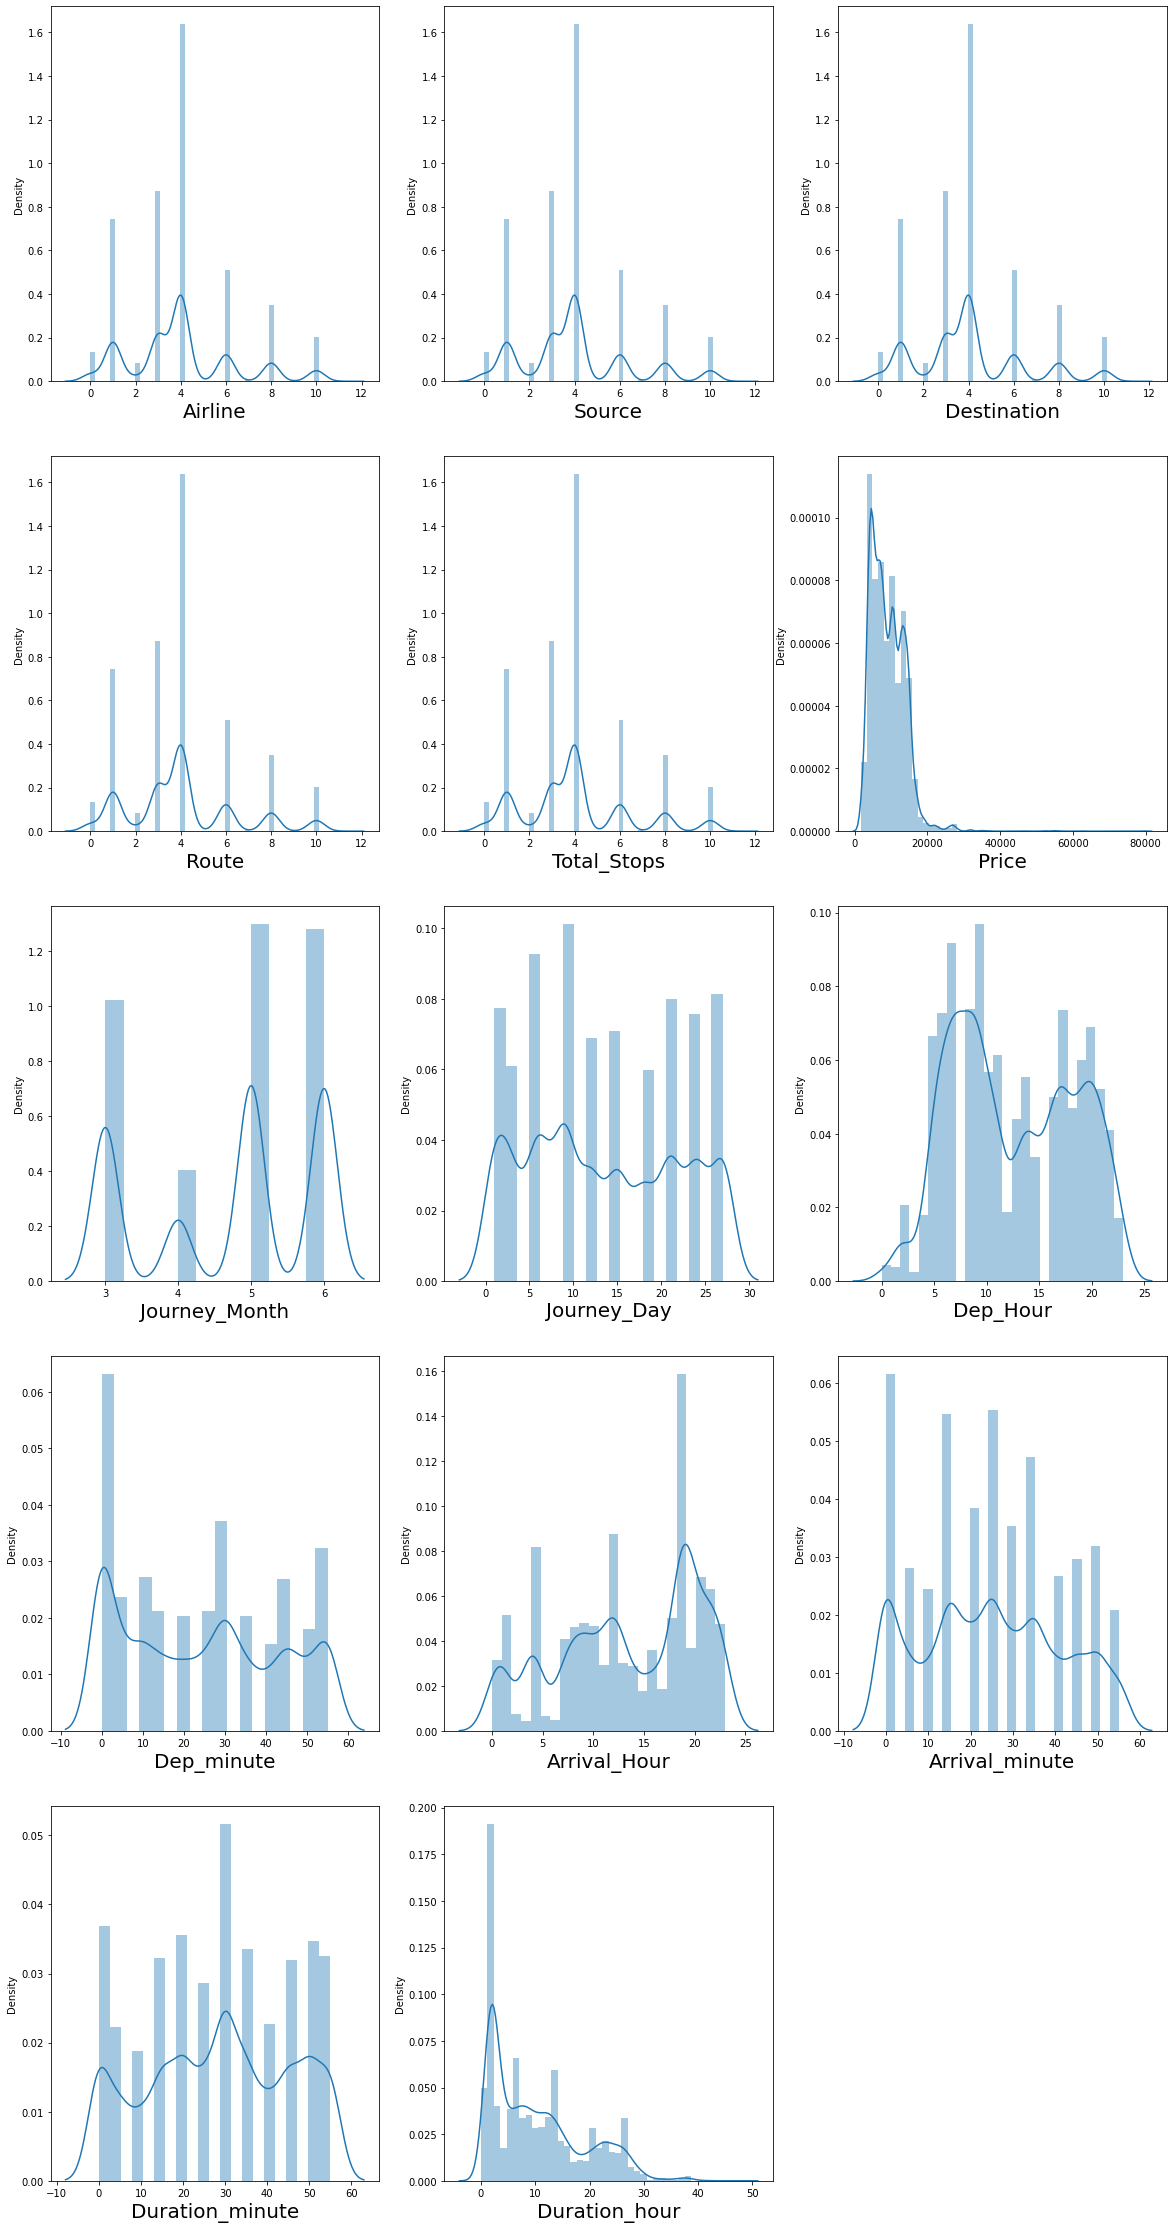

In [45]:
#lets plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in Flight_Train:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(Flight_Train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

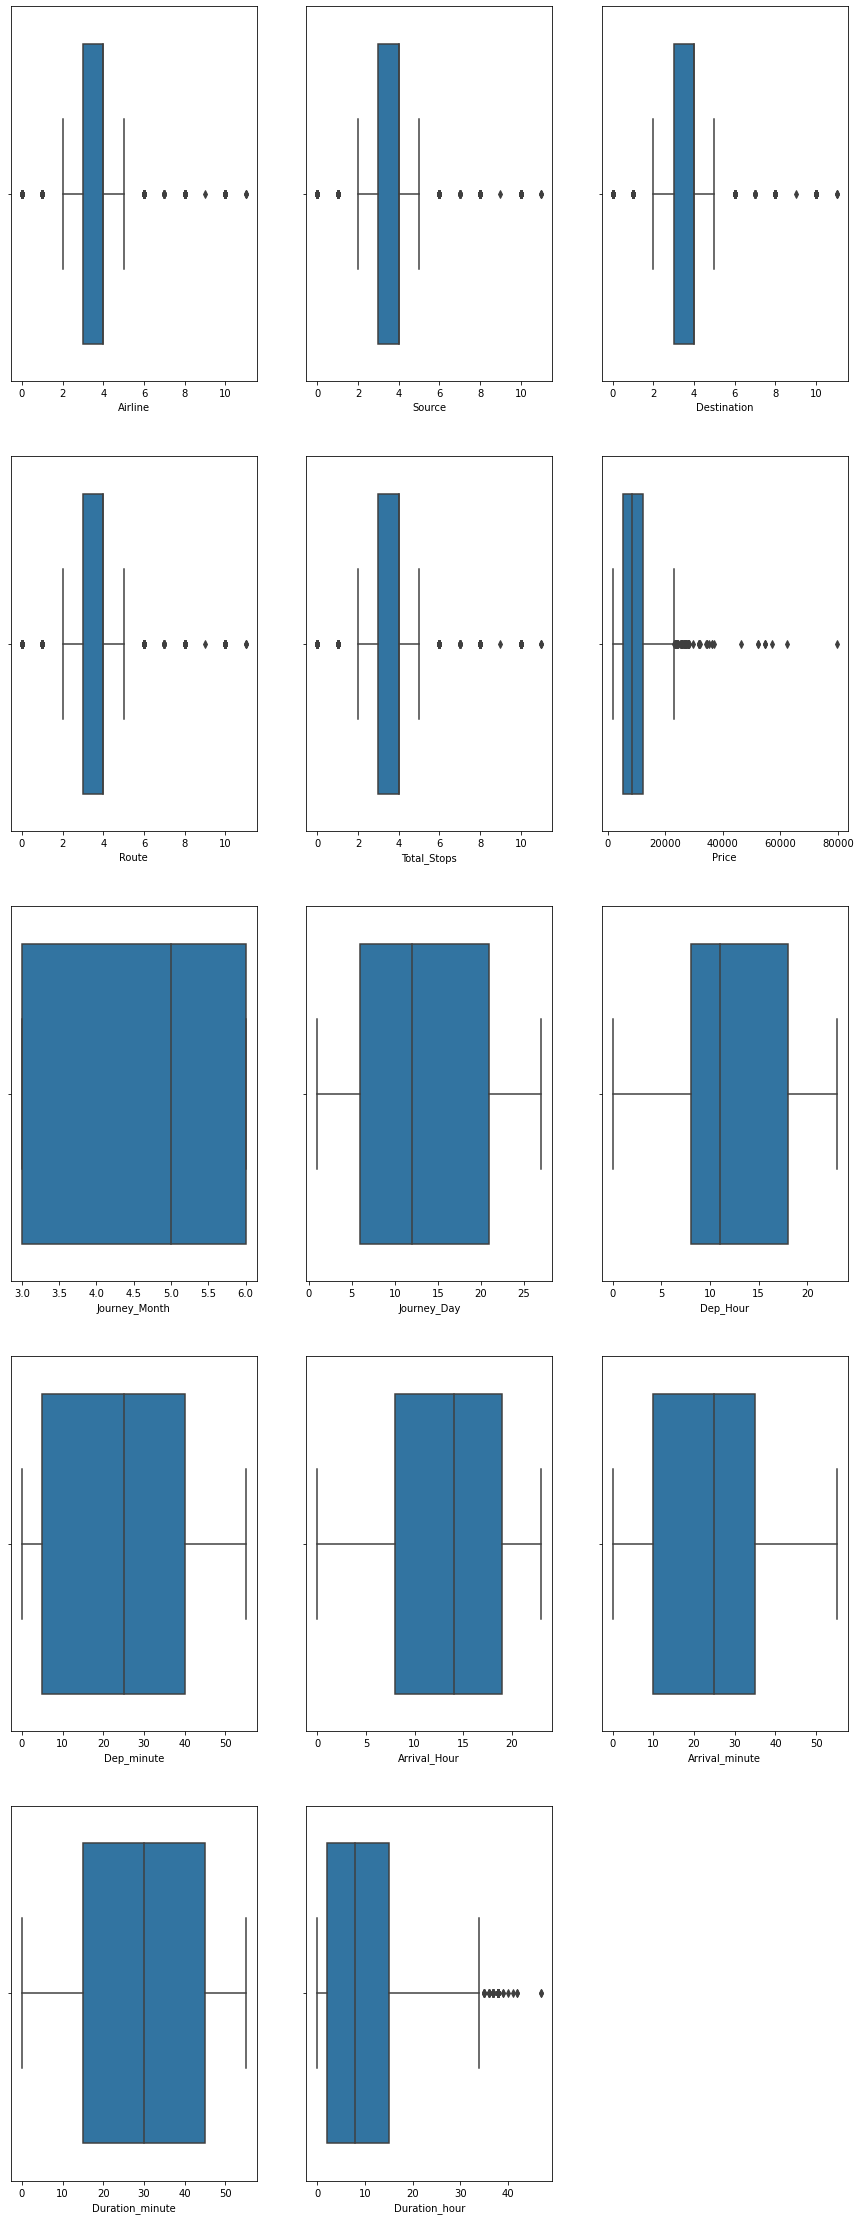

In [46]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,40))
graph=1
for column in Flight_Train:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        ax=sns.boxplot(Flight_Train[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()  

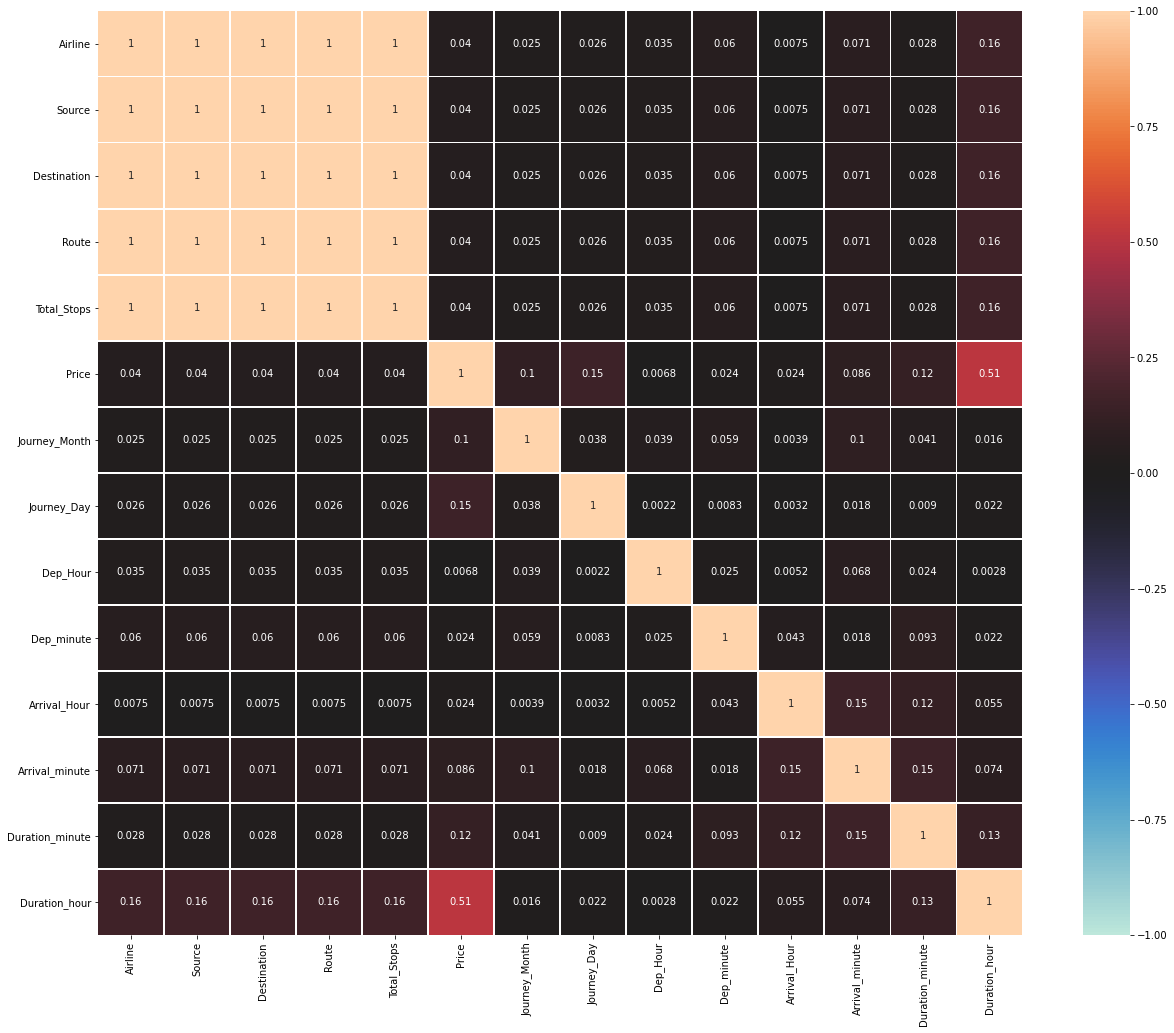

In [47]:
#Plotting Heatmap(Correlation matrix) to check multicollinearity between features
df_corr=Flight_Train.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='Airline', ylabel='Source'>

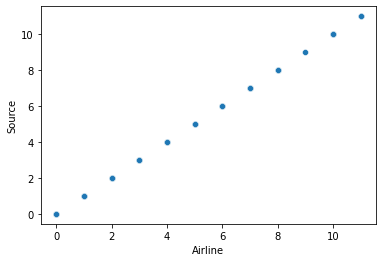

In [48]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Airline',y='Source',data=Flight_Train)

yes it have multicollinearity between Source and Airline we will drop 1 feature

<AxesSubplot:xlabel='Destination', ylabel='Route'>

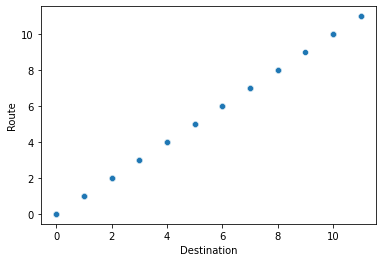

In [49]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Destination',y='Route',data=Flight_Train)

there is multicollinearity between Destination and Route

<AxesSubplot:xlabel='Route', ylabel='Total_Stops'>

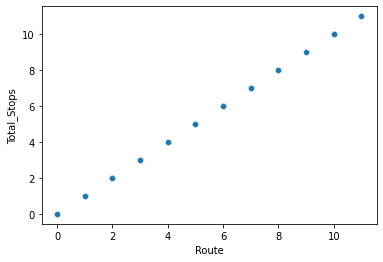

In [50]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Route',y='Total_Stops',data=Flight_Train)

there is now multicollinearity between Route and Total_Stops

<AxesSubplot:xlabel='Airline', ylabel='Route'>

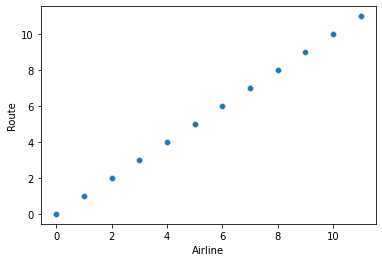

In [51]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Airline',y='Route',data=Flight_Train)

there is multicollinearity between Route and Airline

<AxesSubplot:xlabel='Destination', ylabel='Total_Stops'>

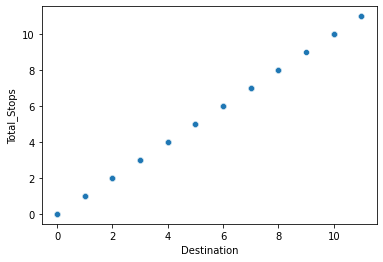

In [52]:
#scatter plot to check multicollinearity
sns.scatterplot(x='Destination',y='Total_Stops',data=Flight_Train)

In [53]:
Flight_Train.drop(columns=['Destination','Total_Stops','Route','Source'],axis=1)

,Airline,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_minute,Duration_hour
0,3.0,3897,3,24,22,20,1,10,50,2
1,1.0,7662,5,1,5,50,13,15,25,7
2,4.0,13882,6,9,9,25,4,25,0,19
3,3.0,6218,5,12,18,5,23,30,25,5
4,3.0,13302,3,1,16,50,21,35,45,4
...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,4,9,19,55,22,25,30,2
10679,1.0,4145,4,27,20,45,23,20,35,2
10680,4.0,7229,4,27,8,20,11,20,0,3
10681,10.0,12648,3,1,11,30,14,10,40,2


# Feature Selection


In [54]:
#seprate dataset into features and Class
X=Flight_Train.drop(columns='Price',axis=1)
Y=Flight_Train.Price

In [55]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=Lr.predict(x_test)

In [59]:
#train model score
Lr.score(x_train,y_train)

0.3032809444970882

In [60]:
#test model score
Lr.score(x_test,y_test)

0.3007489944193068

In [61]:
#score is low so lets do regulrization of model with lasso 
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV 

In [62]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)  

LassoCV(max_iter=100, normalize=True)

In [63]:
alpha=lassocv.alpha_
alpha

0.026103591108326402

In [64]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.026103591108326402)

In [65]:
lasso_reg.score(x_train,y_train)

0.303280944175343

No improvement after parameter tuning

In [66]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [67]:
ridgecv.alpha_

0.001

In [68]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [69]:
ridge_model.score(x_train,y_train)

0.3032809444970834

No improvemnt after parameter tuning 

# RandomForestRegression Model

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=rfr.predict(x_test)

In [73]:
#train data model score
rfr.score(x_train,y_train)

0.9551533623872728

In [74]:
#test data model score
rfr.score(x_test,y_test)

0.7315874350620295

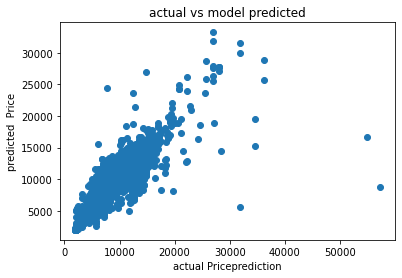

In [75]:
#scatter plot to see predict vs test data
plt.scatter(y_test,y_pred)
plt.xlabel('actual Priceprediction')
plt.ylabel('predicted  Price')
plt.title('actual vs model predicted')
plt.show()

In [76]:
#print r2_score
print(r2_score(y_test,y_pred))

0.7315874350620295


Model Cross validation 

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(rfr,X_scaler,Y,cv=5).mean()

0.7899422561290169

Model accuracy is good as cross validation score matching with test data is underfitt,but train data is slightly overfitting issue

Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_grid={'n_estimators':[100,130,150,170,180,200],
            'max_features':['auto','sqrt'],
            'max_depth':[5,8,10,12,14,16,18],
            'min_samples_split':[2,4,5,7,8,10,12],
            'min_samples_leaf':[1,2,4,6,10]}

In [81]:
grid_search=RandomizedSearchCV(rfr,param_distributions=param_grid,cv=5)

In [82]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 10, 12, 14, 16, 18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 4, 5, 7, 8, 10,
                                                              12],
                                        'n_estimators': [100, 130, 150, 170,
                                                         180, 200]})

In [83]:
#find best parameters
grid_search.best_params_

{'n_estimators': 180,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [84]:
#tune model with best parameters
rfr=RandomForestRegressor(n_estimators=130,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=14)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=130)

In [85]:
#train data score post tuning
rfr.score(x_train,y_train)

0.922400029723423

In [86]:
#test data score post tuning
rfr.score(x_test,y_test)

0.7776199287199955

Post tuning test score is increased but tarining score  is slightly decrease ,need to give more parameters and tuning 

In [87]:
y_pred=rfr.predict(x_test)

In [88]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.7776199287199955


In [89]:
#mean absolute error and mean_squared_error
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))

MAE:  1348.471746174679
MSE:  4836593.261525791


In [90]:
#Cross validation post tuning
cross_val_score(rfr,X_scaler,Y,cv=5).mean()

0.8071883603676275

# KNN Regression model

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [93]:
y_pred=knn.predict(x_test)

In [94]:
#Train data model score
knn.score(x_train,y_train)

0.8000183587162323

In [95]:
print(r2_score(y_test,y_pred))

0.6954107181843815


In [96]:
#cross validation of knn model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

0.7014670025930326

Hyperparameter Tuning of knn model

In [97]:
param_grid={'n_neighbors':[5,7,9,11,13,15],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[10,12,15,20,30],
    'p':[2,4,6,8,10]
    
}

In [98]:
grid_search=RandomizedSearchCV(knn,param_distributions=param_grid,cv=5)

In [99]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [10, 12, 15, 20, 30],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'p': [2, 4, 6, 8, 10],
                                        'weights': ['uniform']})

In [100]:
grid_search.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 7,
 'leaf_size': 20,
 'algorithm': 'auto'}

In [101]:
#tune KNN with best parameters 
knn=KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2,leaf_size=10,algorithm='auto')

In [102]:
#fit knn model with train data
knn.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=10)

In [103]:
y_pred=knn.predict(x_test)

In [104]:
#post tuning model score
knn.score(x_train,y_train)

0.8001001354496509

In [105]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.6956724933722891


In [106]:
#cross validation of KNN model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

0.7015469496171013

# Decesion Tree MOdel

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [109]:
y_pred=dt.predict(x_test)

In [123]:
#model score
dt.score(x_train,y_train)

0.9733923325614476

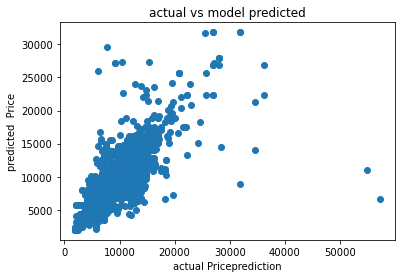

In [124]:
#scatter plot to see predict vs test data
plt.scatter(y_test,y_pred)
plt.xlabel('actual Priceprediction')
plt.ylabel('predicted  Price')
plt.title('actual vs model predicted')
plt.show()

In [125]:
#print r2_score
print(r2_score(y_test,y_pred))

0.6155974909634154


In [126]:
#cross validation of DecesionTreeRegression model
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.659203676847631

Model is overfitted cv score is 65 and model score is 97 

Hyperparameter Tuning of DecesionTree Model

In [128]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [130]:
#RandomizesearchCV 
grid_search=RandomizedSearchCV(estimator=dt,param_distributions=parametrs,cv=5)

In [131]:
#fit new parameters with training data
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': range(1, 20, 2),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 16, 2),
                                        'min_weight_fraction_leaf': [0.01, 0.02,
                                                                     0.1, 1]})

In [132]:
grid_search.best_params_

{'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'criterion': 'mse'}

In [133]:
#model initiate with new parameters
dt=DecisionTreeRegressor(criterion='mse',min_weight_fraction_leaf=.01,min_impurity_split=8,min_samples_leaf=1,max_depth=15)

In [134]:
#fit model to training dataset
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_impurity_split=8,
                      min_weight_fraction_leaf=0.01)

In [135]:
#predicted 
y_pred=dt.predict(x_test)

In [136]:
#model score
dt.score(x_train,y_train)

0.6851250093570203

In [137]:
#print r2_score post tuning of model
print(r2_score(y_test,y_pred))

0.6512314079531307


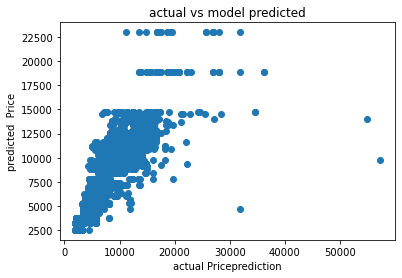

In [139]:
#scatter plot to see predict vs test data
plt.scatter(y_test,y_pred)
plt.xlabel('actual Priceprediction')
plt.ylabel('predicted  Price')
plt.title('actual vs model predicted')
plt.show()

In [138]:
#print r2_score post tuning of model
print(r2_score(y_test,y_pred))

0.6512314079531307


In [111]:
#saving model Random forest because model accuracy cross validation scaore and r2 score is best among all model 
import pickle
filename='finalized_model.pickel'
pickle.dump(rfr, open(filename,'wb'))